# Linear Regression Pytorch Demonstration
Robbie Plata

In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
%matplotlib inline
from tqdm import trange
import torch.nn as nn

#### 50x1 linear float tensor

In [2]:
X = torch.linspace(1,50,50).reshape(-1,1)

#### 50x1 error tensor

In [3]:
error = torch.randint(-8,9,(50,1), dtype=torch.float)

$f(x) = 2(x) + 1 + error$

In [4]:
y = 2*X + 1 + error

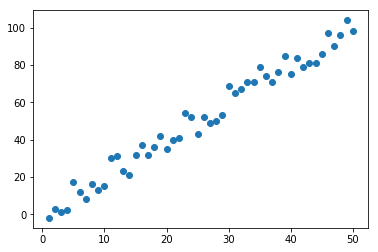

In [5]:
plt.scatter(X.numpy(), y.numpy())

In [6]:
torch.manual_seed(51)

### Linear layer Test

In [7]:
model = nn.Linear(1,1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.9745]], requires_grad=True)
Parameter containing:
tensor([0.4807], requires_grad=True)


### Single Layer Linear Regression Model with no actuation

In [8]:
class Model(nn.Module):
    
    def __init__(self, in_features, out_features):
        super().__init__() # Inherit
        self.linear = nn.Linear(in_features, out_features)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

### Single Neuron Model tracking gradient

In [9]:
torch.manual_seed(51)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.9745]], requires_grad=True)
Parameter containing:
tensor([0.4807], requires_grad=True)


### Weight and bias by given manual seed

In [10]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.9744870662689209
linear.bias 	 0.4807196855545044


### Forward Propogation
$\sum\limits_{i=1}^n z(x) = (w_{i}x_{i}) + b_{i}$

In [11]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([2.4297], grad_fn=<AddBackward0>)


In [12]:
x1 = np.linspace(0.0, 50.0, 50)

### Applying and plotting an arbitrary weight and bias to a linspace tensor

In [13]:
w1 = 0.9744
b = 0.4807
y1 = w1*x1 + b
y1

array([ 0.4807    ,  1.47498571,  2.46927143,  3.46355714,  4.45784286,
        5.45212857,  6.44641429,  7.4407    ,  8.43498571,  9.42927143,
       10.42355714, 11.41784286, 12.41212857, 13.40641429, 14.4007    ,
       15.39498571, 16.38927143, 17.38355714, 18.37784286, 19.37212857,
       20.36641429, 21.3607    , 22.35498571, 23.34927143, 24.34355714,
       25.33784286, 26.33212857, 27.32641429, 28.3207    , 29.31498571,
       30.30927143, 31.30355714, 32.29784286, 33.29212857, 34.28641429,
       35.2807    , 36.27498571, 37.26927143, 38.26355714, 39.25784286,
       40.25212857, 41.24641429, 42.2407    , 43.23498571, 44.22927143,
       45.22355714, 46.21784286, 47.21212857, 48.20641429, 49.2007    ])

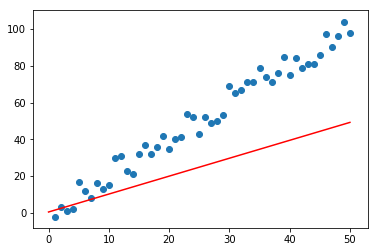

In [14]:
plt.plot(x1,y1, 'red')
plt.scatter(X.numpy(), y.numpy())

### Mean squared error 
$MSE = \frac{1}{n}\sum\limits_{i=1}^n (Y_{i} - \hat{Y}_{i})^2$

(The average of the squared differences between the predicted and actual values)

In [15]:
criterion = nn.MSELoss()

### Stochastic gradient descent with step size of 0.001
Uses the cost gradient of 1 example at each iteration.
Calculates the error for each example in the training dataset but only updates the model have all training examples are evaluated. Tiny step size.

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### Training
1. 50 Epochs/Iterations (total passes through the dataset). 
2. Feed to output neuron.
3. Calculate loss with mean squared error.
4. Track Loss.
5. Reset gradient (zero).
6. Minimize the cost function (backpropogate) by

Compute the rate of change of C (cost) with respect to the output activations starting at the last layer L and finishing with with L-1 where L=2 (the last back propogation).

$δ^L=\nabla_{a} C ⊙ \sigma' (z^L)$

Or

$δ^L=(a^L-y) ⊙ \sigma' (z^L)$

This gives us the error.

Move the error backwards through the activation functions in layer 
${l}$. Written out in terms of the error in the next layer (moving backwards).

$δ^l = (w^{l+1})^T δ^{l+1} ⊙ \sigma'(z^l)$

- $y$ - True value
- $a^L$ - Activation of last output layer
- ${⊙}$ - Hadamard product
- ${𝜎}'$ - Activation
- $L$ - Last output layer
- ${l}$ - Layer
- ${T}$ - Transpose


The gradient of the cost function is given by 

### $\frac {\partial C} {\partial w^{l}_{jk}} = a^{l-1}_{k} δ^l_{j}$

### $\frac {\partial C} {\partial b^{l}_{j}} = δ^l_{j}$

7. Perform a parameter update (step) based on the gradient stored in paramater.grad.

Note: No activations for linear regression.

In [17]:
epochs = 50 # 1
losses = []

for i in trange(epochs):
    i += 1
    y_pred = model.forward(X) # 2
    loss = criterion(y_pred, y) # 3
    losses.append(loss) # 4
    print(f'epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}')
    optimizer.zero_grad() # 5
    loss.backward() # 6
    optimizer.step() # 7
    

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

epoch 1 loss: 900.6716918945312 weight: 0.9744870662689209 bias: 0.4807196855545044


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 156.01it/s]

epoch 2 loss: 476.617431640625 weight: 2.709535837173462 bias: 0.5315393805503845
epoch 3 loss: 257.6933288574219 weight: 1.4629143476486206 bias: 0.49376997351646423
epoch 4 loss: 144.6705322265625 weight: 2.358668327331543 bias: 0.5196537971496582
epoch 5 loss: 86.32054138183594 weight: 1.7150925397872925 bias: 0.4998024106025696
epoch 6 loss: 56.19631576538086 weight: 2.177548885345459 bias: 0.5128130912780762
epoch 7 loss: 40.64394760131836 weight: 1.8453041315078735 bias: 0.5022124648094177
epoch 8 loss: 32.61460494995117 weight: 2.084064245223999 bias: 0.5085775256156921
epoch 9 loss: 28.46905517578125 weight: 1.912548542022705 bias: 0.5027530789375305
epoch 10 loss: 26.328596115112305 weight: 2.0358221530914307 bias: 0.5056875944137573
epoch 11 loss: 25.22331428527832 weight: 1.947285532951355 bias: 0.5023292899131775
epoch 12 loss: 24.652441024780273 weight: 2.010937452316284 bias: 0.503493070602417
epoch 13 loss: 24.35746192932129 weight: 1.9652396440505981 bias: 0.50140827894

### Convergence around the 10th epoch.

Text(0.5, 0, 'Epoch')

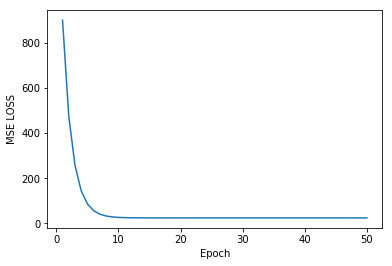

In [18]:
plt.plot(X.numpy(), losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch')

### Plot of prediction
predicted_y (current weight + bias) fits to the 1x50 (2x + 1 + error) tensor.


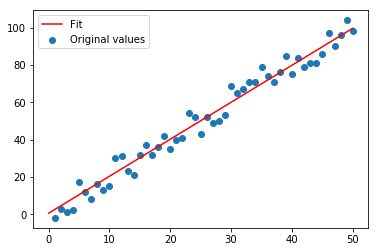

In [19]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*x + current_bias
plt.scatter(X.numpy(), y.numpy(), label="Original values") # Original values
plt.plot(x, predicted_y, 'r', label="Fit") # Linear fit to dataset
plt.legend()